# Distributions

Interesting sources: 
- https://app.datacamp.com/learn/courses/foundations-of-probability-in-python

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

![](https://wherethewindsblow.com/wp-content/uploads/2023/06/JUMBO-Six-sided-white-dice.jpg)

We are simulating the process of rolling a standard six-sided die. Each roll produces a random integer between 1 and 6, with all outcomes being equally likely. By generating multiple samples within this range, we can observe how the distribution of results begins to resemble a uniform distribution as the number of rolls increases.

In [2]:
minValue = 1 #  
maxValue = 6 # Maximum value of the dice
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

Now we simulate rolling the die ```numberOfSamples``` times:
If you rerun the script you can see that the values change, just like a 'real' die.

In [10]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )
results

0    3
1    1
2    3
3    4
4    3
5    3
dtype: int32

<Axes: >

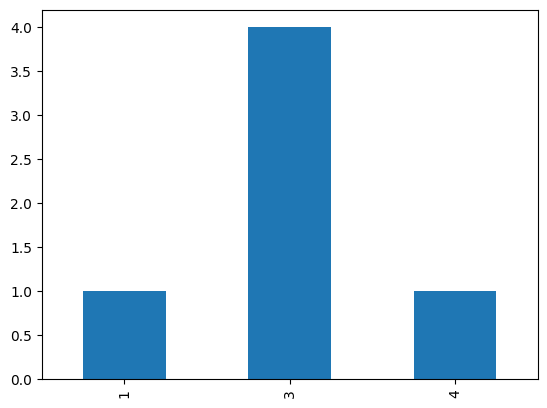

In [11]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length of  a full-grown citizen in the Netherlands.

In [22]:
averageLength = 174.25 # Average length of a person in cm
stdLength = 8 # Standard deviation of the length of a person in cm
numberOfPeopleToSample = 3000 # Play with these values to show the impact on the histogram

In [23]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )
randomLengths.head()

0    171.730303
1    183.551264
2    175.298617
3    180.531294
4    172.949435
dtype: float64

<Axes: ylabel='Frequency'>

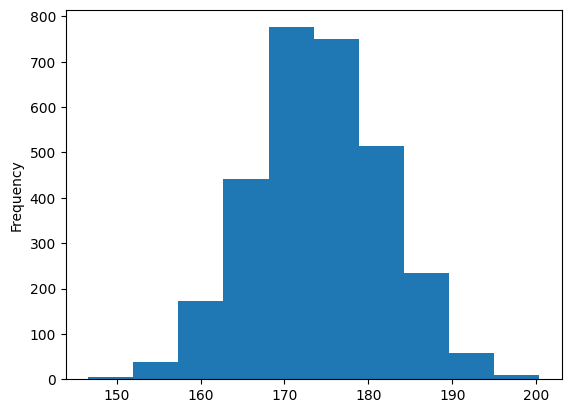

In [24]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

**What is the Central Limit Theorem?**
In simple terms:

If you take many random samples of a certain size from any population, and calculate the mean of each sample, then the distribution of those sample means will:
- Be approximately normal (bell-shaped)
- Have the same average as the original population
- Have a smaller spread (standard deviation gets smaller as sample size increases)
- Even if the original data is not normally distributed!

**Why is this useful?**
Because it lets us:
- Use normal distribution tools (like confidence intervals) on data that isn't normal
- Make predictions and inferences about population averages
- Justify why the mean is a reliable estimate with large samples



In [28]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 100 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [29]:
sampleMeans

[np.float64(172.55545664870834),
 np.float64(173.4649486288077),
 np.float64(174.49374818646322),
 np.float64(172.90741917741215),
 np.float64(174.38091710200402),
 np.float64(176.26708788895405),
 np.float64(174.4427609227913),
 np.float64(173.66357756099248),
 np.float64(173.75365447695492),
 np.float64(174.43570991146396),
 np.float64(174.99643519832964),
 np.float64(175.20214893914417),
 np.float64(173.96874831886285),
 np.float64(173.62216424192866),
 np.float64(174.03299866910908),
 np.float64(176.3574175141769),
 np.float64(174.23816505878366),
 np.float64(173.69244721671473),
 np.float64(174.2467074446549),
 np.float64(173.71971379696095),
 np.float64(175.28224804719414),
 np.float64(174.2172786485875),
 np.float64(174.32146077207304),
 np.float64(173.28205599189357),
 np.float64(174.27776042401828),
 np.float64(173.69288848877466),
 np.float64(174.21283955416047),
 np.float64(174.1812345172678),
 np.float64(174.21851744790604),
 np.float64(174.8362720936131),
 np.float64(172.9

<Axes: ylabel='Frequency'>

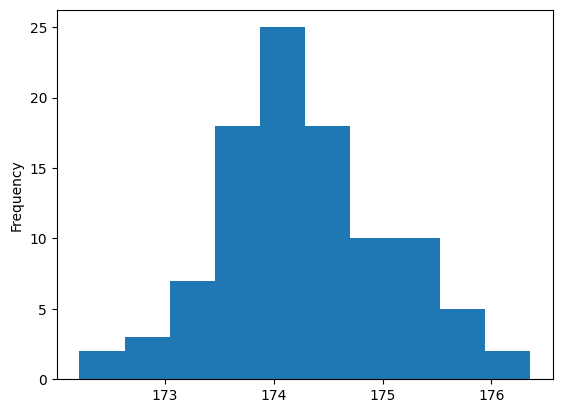

In [30]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [32]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<Axes: ylabel='Frequency'>

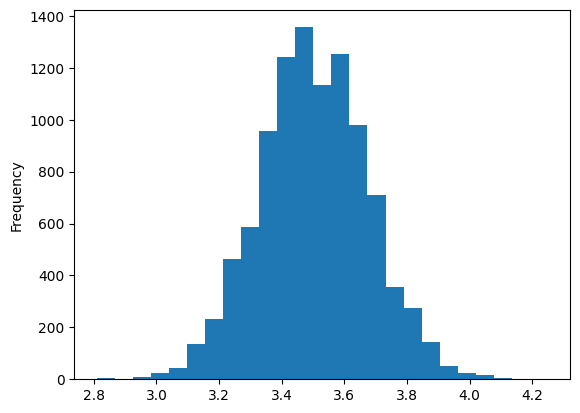

In [33]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://datatab.net/assets/tutorial/confidence_interval.png)

![](https://datatab.net/assets/tutorial/Confidence_interval_formula.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [15]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(172.88433161599303, 176.42013608467542)

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.068678741454304, 3.771321258545696)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [17]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507366, 5.976934185159301)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm


![](https://i.imgur.com/0v1CGNV.png)<br>
Findings: ...<br>

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)<br>
Assumptions: ...<br>
Findings: ...<br>